## The AKS Primality Test among otherss
The AKS primality test was a revolutionary method of determining if a number is prime in polynomial time, specifically the current best time is $O(log(n)^6)$, but it is theorized to be able to run in $O(log(n)^3)$ if [Agrawal's Conjecture](https://en.wikipedia.org/wiki/Agrawal%27s_conjecture) is proven true. There are other methods, with different complexity that will be discussed along the way. I hope you enjoy!


In [38]:
from matplotlib import pyplot as plt
from numpy.random import randint
from numpy import arange, int64
from math import sqrt, log, floor
from sympy import isprime
import time

#First, lets get a big list of numbers to compare all our trials with.
NumberList = randint(low=2, high=10000000, size=1000000, dtype=int64)

#Also this list will keep track of times, useful later
time_list = []

### Simple Methods
Before we get to the cool stuff, we have to go over the simple methods. These are not named for the most part, and just involve checking specific numbers in a range. We will go from the simplest, checking from 2 to $n^{1/2}$, to more complex ones that skip over certain numbers.

In [39]:
def primeroot(n):
    for num in range(2,int(sqrt(n))):
        if num % n == 0:
            return False
    return True

def sixkroot(n):
    if n % 2 == 0 or n % 3 == 0:    return False
    num = 1
    while 6*num + 1 <= int(sqrt(n)):
        if 6*num + 1 % n == 0:
            return False
        if 6* num + 5 % n == 0:
            return False
        num += 1
    return True

def time_test(func, lister=NumberList):
    start_time = time.time()
    for num in lister:
        func(num)
    return time.time() - start_time

In [40]:

time_list.append(time_test(primeroot))
print(f'Completed Prime at time: {time_list[-1]}')
time_list.append(time_test(sixkroot))
print(f'Complete SixKRoot at time: {time_list[-1]}')
completed = ["Root Test", "Root and six"]

Completed Prime at time: 194.24032402038574
Complete SixKRoot at time: 120.14442777633667


### Initial Visualization
Now, lets do a bit of a visualization to see the difference between our two simple methods.

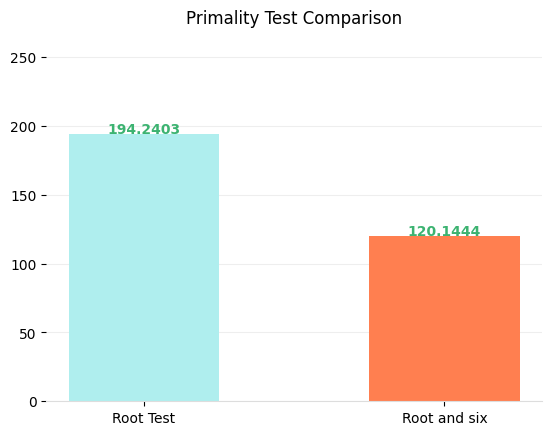

In [41]:

fig, ax = plt.subplots()
bars = ax.bar(completed, time_list, color=['paleturquoise','coral'], width=0.5)
ax.set_ylim(0, max(time_list) + abs(time_list[0] - time_list[1]))

ax.set_title("Primality Test Comparison")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.005,
      round(bar.get_height(), 4),
      horizontalalignment='center',
      color="mediumseagreen",
      weight='bold'
  )
plt.show()

# Wow!!!
Please note, that y axis is on a reduce scale; at a larger scale it would be more noticeable, but still not by much. Specifically, the difference is $O(n^{1/2})$ as compared to $O(\frac{n^{1/2}}{3})$ for each n within the set of 25,000,000. Let's move onto the next method, called the miller rubin which works based on the correctness of the (unproven) Generalized Riemann Hypothesis. This is sort of hard to explain without you reading the [wikipedia page here](https://en.wikipedia.org/wiki/Miller%E2%80%93Rabin_primality_test#Deterministic_variants). Importantly, this is not a foolproof method, it is called a probabalistic test because it can sometimes miss composite numbers. The Miller Rubin test functions on the concept of what are called *Strong Probable* primes, which means it satisfies a condition satisfied by all prime numbers and only a few composite numbers. This is why the test doesn't actually get only primes, but gets all primes and some composite numbers. Specifically, for some odd n > 2, let n - 1 = $2^sd$.  n is said to be a strong probable prime if one of the two following congruence relations holds in $\mathbb{Z}_n$. Either, for some integer a, $a^d \equiv 1 \mod{n}$ or $a^{2^rd} \equiv 1 \mod{n}$, then n is a strong probable prime in base a. If n is not, then n is definitely composite. This is how we filter out so many of these numbers, because we know this property of primes has to be satisfied meaning, if we can bound a to a small range, like say 5 numbers, we would need way less comparisons. Lets see it!

In [42]:
def millerrubin(n):
    if n % 2 == 0:  return False    #We don't care about even n.
    ns = n - 1
    s = 0
    while ns % 2 == 0 and ns != 0:
        ns /= 2
        s += 1
    d = ns
    for a in range(min(n-2, floor(2*(log(n))**2))):
        x = (a ** d) % n
        for i in range(s):
            y = x**2 % n
            if y == 1 and x != 1 and x != n-1:
                return False
            x = y
        if y != 1:  return False
    return true

def boundedmillerrubin(n): # These bounds are based on the work of Pomerance, Selfridge, Wagstaff and Jaeschke. There are higher bounded, but ours are only needed so far.
    if n % 2 == 0:  return False    #We don't care about even n.
    ns = n - 1
    s = 0
    while ns % 2 == 0 and ns != 0:
        ns /= 2
        s += 1
    d = ns
    boundkey = {2047: [2], 1373653: [2,3], 9080191: [31, 73], 25326001: [2,3,5], 3215031751: [2,3,5,7]}
    for key in boundkey.keys():
        if n < key:
            akey = key
            break
    for a in boundkey[akey]:
        x = (a ** d) % n
        for i in range(s):
            y = x**2 % n
            if y == 1 and x != 1 and x != n-1:
                return False
            x = y
        if y != 1:  return False
    return True


In [43]:
time_list.append(time_test(millerrubin))
print(f"Finished Miller Rubin test at {time_list[-1]}")
time_list.append(time_test(boundedmillerrubin))
print(f"Finished Bounded Miller Rubin test at {time_list[-1]}")
completed.append("Miller Rubin")
completed.append("Bounded Miller Rubin")

Finished Miller Rubin test at 3.369264602661133


C:\Users\bobby\AppData\Local\Temp\ipykernel_16328\371014432.py:33: RuntimeWarning: overflow encountered in scalar power
  x = (a ** d) % n
C:\Users\bobby\AppData\Local\Temp\ipykernel_16328\371014432.py:33: RuntimeWarning: invalid value encountered in scalar remainder
  x = (a ** d) % n


Finished Bounded Miller Rubin test at 7.358402729034424


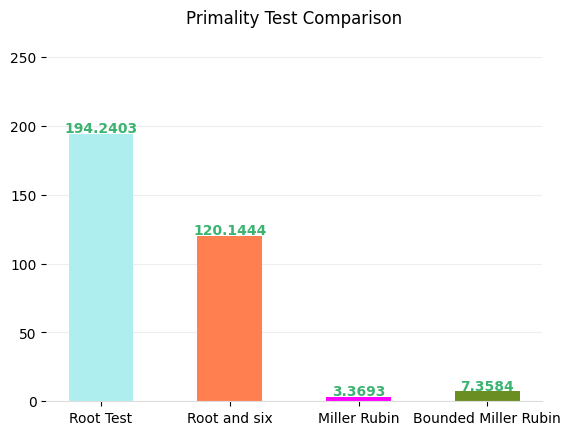

In [49]:

fig, ax = plt.subplots()
bars = ax.bar(completed, time_list, color=['paleturquoise','coral', 'fuchsia', 'olivedrab'], width=0.5)
ax.set_ylim(0, max(time_list) + abs(time_list[0] - time_list[1]))

ax.set_title("Primality Test Comparison")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.9,
      round(bar.get_height(), 4),
      horizontalalignment='center',
      color="mediumseagreen",
      weight='bold'
  )
plt.show()

TODO: Add RKS and maybe one more